<p style="font-size:32px;text-align:center"><b><font color=DarkMagenta>Amazon Apparel Recommendations</font></b></p>
<p style="font-size:20px;text-align:center"><b><font color=DarkGoldenRod>Part 3</font></b></p>

<p style="font-size:22px;text-align:center"><b><font color=Turquoise>Deep Learning Based Visual Product Similarity - CNN</font></b></p>

<p style="text-size:15px">
Till now, we have been used **Titles**, **Brand** and **Color** for product similarity.<br>
**For Titles, we used BoW, TF IDF and Word2Vec** techniques and **For Brand & Color, we used One Hot Encoding** technique.<br><br>
    
There is one more very interesting parameter **Product Image Url**.<br>
For every product we have **url** for product Image and with the help of url we can download the product Image.<br><br>
    
Now the question is **How to featurize an image OR How to convert an Image to n-dimensional vector ?**<br><br>
    
We can convert an Image to n-dimensional vector using **Deep Learning** technique called **Convolutional Neural Network (CNN/ConvNets)**.<br><br>

Since 2012, Google, Microsoft, Baidu, Nvidia, Facebook, Amazon and lots of companies & also some of universities like Oxford trained special ConvNets which works well.<br>
There are multiple ConvNets like **AlexNets, VGG16, VGG19, ResNet** which used to convert an Image to n-dimensional vector. We will employ one of these algorithms.
<br><br>
Training and desgining good ConvNets is very very expensive as it requires lots of hardwares, requires lots of expertise.
<br><br>
If two Image are very similar then the euclidean distance between two vectors of Image is very small.</p>

<h3><font color=MediumVioletRed>Keras and Tensorflow To Extract Features</font></h3>

<p style="text-size:15px">
- There are multiple types of **Convolutional Neural Network (CNN/ConvNets)**, as already mentioned above. We are going to use one of the very popolar ConvNet - **VGG16**.<br>
- **VGG16** (also called OxfordNet) is a Convolutional Neural Network architecture named after the **Visual Geometry Group** from **Oxford**, who developed it.
<br><br>
Now to compute the n-dimensional vector from given Image, we will use two very popular libraries **Keras** and **Tensorflow**.
<br>
- **Tensorflow** is deep learning library which is designed and built at **Google** which is open source library.<br>
- Similarly, **Keras** is also popular open source library which simplifies building CNNs and other types of Neural Networks very easily.</p>

In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle
from IPython.display import display, Image, SVG, Math, YouTubeVideo

In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("D:/Amazon Apparel Recommendation Engine")

In [4]:
#ref: https://gist.github.com/fchollet/f35fbc80e066a49d65f1688a7e99f069
#code_reference: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

#this code takes 40 minutes to run on a modern GPU (graphics card) like Nvidia  1050
#GPU (NVidia 1050): 0.175 seconds per image

#this codse takes 160 minutes to run on a high end i7 CPU
#CPU (i7): 0.615 seconds per image.

#each image is converted into 25088 length dense-vector

'''
#dimensions of our images.
img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'images2/'
nb_train_samples = 16042
epochs = 50
batch_size = 1


def save_bottlebeck_features():
    #function to compute VGG-16 CNN for image feature extraction.
    
    asins = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    
    #build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    for i in generator.filenames:
        asins.append(i[2:-5])

    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
    bottleneck_features_train = bottleneck_features_train.reshape((16042,25088))
    
    np.save(open('16k_Products_Data_CNN.npy', 'wb'), bottleneck_features_train)
    np.save(open('16k_Products_Data_CNN_asins.npy', 'wb'), np.array(asins))
    

save_bottlebeck_features()
'''

<h3><font color=MediumVioletRed>Loading Data</font></h3>

In [5]:
#load the original 16k_preprocessed dataset
apparel_data = pd.read_pickle("Saved Files/16k_Prep_Products_Data")

In [6]:
#load the features and corresponding ASINS info
bottleneck_features_train = np.load('16k_Products_Data_CNN.npy')

asins = np.load('16k_Products_Data_CNN_asins.npy')
asins = list(asins)

<p style="font-size:15px"><b><font color=Crimson>Visual Features Based Product Similarity</font></b></p>

In [7]:
df_asins = list(apparel_data['asin'])

#get similar products using CNN features (VGG-16)
def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = apparel_data[['medium_image_url','title']].loc[apparel_data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance From The Query Image:', pdists[i])
            print('Amazon URL: www.amzon.com/dp/'+ asins[indices[i]])

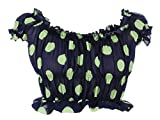

Product Title:  annakaci sm fit blue green polka dot tie front ruffle trim blouse 
Euclidean Distance From The Query Image: 6.32596e-06
Amazon URL: www.amzon.com/dp/B00KLHUIBS


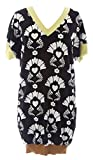

Product Title:  eternal child womens black floral printed vneck short sleeve tunic sz new 
Euclidean Distance From The Query Image: 47.391518
Amazon URL: www.amzon.com/dp/B0184RPZNM


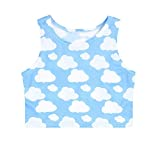

Product Title:  harajuku cloud printed elastic crop tops women 
Euclidean Distance From The Query Image: 48.21552
Amazon URL: www.amzon.com/dp/B01KQHFVP0


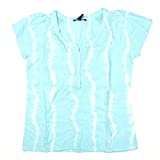

Product Title:  bandolino womens erin round v neck tie dyed shirt top small aqua refelction 
Euclidean Distance From The Query Image: 48.509647
Amazon URL: www.amzon.com/dp/B00ROB8A8W


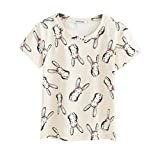

Product Title:  new kawaii cotton pastel tops tees rabbit design 
Euclidean Distance From The Query Image: 48.602116
Amazon URL: www.amzon.com/dp/B074S5F9ZK


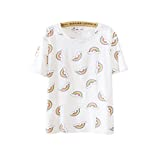

Product Title:  cute womens tops tees pastel rainbow print size 
Euclidean Distance From The Query Image: 48.69884
Amazon URL: www.amzon.com/dp/B01415UNVU


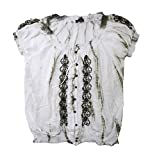

Product Title:  fever ladies size small rayon blouse white  green 
Euclidean Distance From The Query Image: 48.728474
Amazon URL: www.amzon.com/dp/B0731PMQZ2


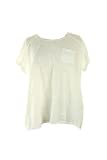

Product Title:  style  co plus size new whit cuffed shortsleeve tee 2x 1498 dbfl 
Euclidean Distance From The Query Image: 48.86433
Amazon URL: www.amzon.com/dp/B0178WOJVS


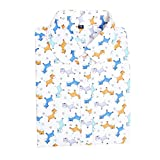

Product Title:  women blouses turn collar floral tops lady long sleeve shirt sxxxxl 
Euclidean Distance From The Query Image: 48.97316
Amazon URL: www.amzon.com/dp/B07552VG9B


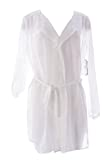

Product Title:  miraclebody miraclesuit womens roll sleeve long tunic sz medium ivory 
Euclidean Distance From The Query Image: 49.00902
Amazon URL: www.amzon.com/dp/B01MUF826N


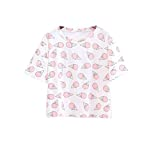

Product Title:  womens kawaii cotton pastel tops tees pink ice cream design 
Euclidean Distance From The Query Image: 49.05505
Amazon URL: www.amzon.com/dp/B06XG3LBFC


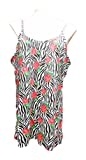

Product Title:  op juniors plus scoop neck tank 2x 1921 zebrarose 
Euclidean Distance From The Query Image: 49.129025
Amazon URL: www.amzon.com/dp/B06Y6KNDBG


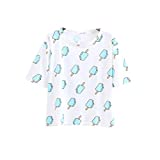

Product Title:  womens kawaii cotton pastel tops tees ice cream pop design 
Euclidean Distance From The Query Image: 49.15118
Amazon URL: www.amzon.com/dp/B06XG1Q7SD


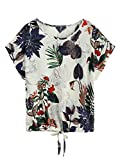

Product Title:  floerns womens tropical print drawstring hem tshirt onesize multicolor 
Euclidean Distance From The Query Image: 49.156002
Amazon URL: www.amzon.com/dp/B06VW9CZ8Y


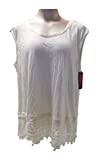

Product Title:  merona womens blouse shell xxl 
Euclidean Distance From The Query Image: 49.20418
Amazon URL: www.amzon.com/dp/B06ZYH5VXR


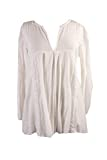

Product Title:  denim supply white lacetrim cotton swing tunic 
Euclidean Distance From The Query Image: 49.21299
Amazon URL: www.amzon.com/dp/B06XFNJXS7


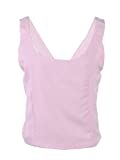

Product Title:  annakaci sm fit pink bow ribbon back trim racer detail shell style top 
Euclidean Distance From The Query Image: 49.216335
Amazon URL: www.amzon.com/dp/B00KOBQEBO


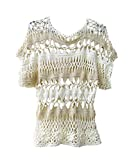

Product Title:  tinacrochetstudio crochet summer tops designer blouse short sleeve jumpsuits 
Euclidean Distance From The Query Image: 49.22291
Amazon URL: www.amzon.com/dp/B016YGD3TI


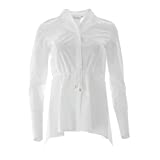

Product Title:  max mara womens curve tie waist button shirt sz 2 white 
Euclidean Distance From The Query Image: 49.23991
Amazon URL: www.amzon.com/dp/B06WWJQ3P2


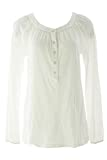

Product Title:  velvet graham  spencer womens buttondown cotton top small winter white 
Euclidean Distance From The Query Image: 49.280148
Amazon URL: www.amzon.com/dp/B01MQJ2NV8


In [9]:
get_similar_products_cnn(931, 20)